# Orders - Multivariate Regression of  the `review_score`

In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [50]:
orders = pd.read_csv("data/tablon_primario.csv")

In [51]:
orders_analisis = orders[[ 'tiempo_de_espera', 'real_vs_esperado', 'review_score',
       'es_cinco_estrellas', 'es_una_estrella', 'numero_de_productos',
       'numero_de_vendedores', 'price', 'freight_value',
       'distancia_al_cliente']]

Uso solo las variables numéricas

In [52]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'status_de_la_orden', 'tiempo_de_espera',
       'tiempo_de_espera_previsto', 'real_vs_esperado', 'review_score',
       'es_cinco_estrellas', 'es_una_estrella', 'numero_de_productos',
       'numero_de_vendedores', 'price', 'freight_value',
       'distancia_al_cliente'],
      dtype='object')

Let's recall our simple analysis from yesterday's exercise: 

¿ Aqué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

<Axes: >

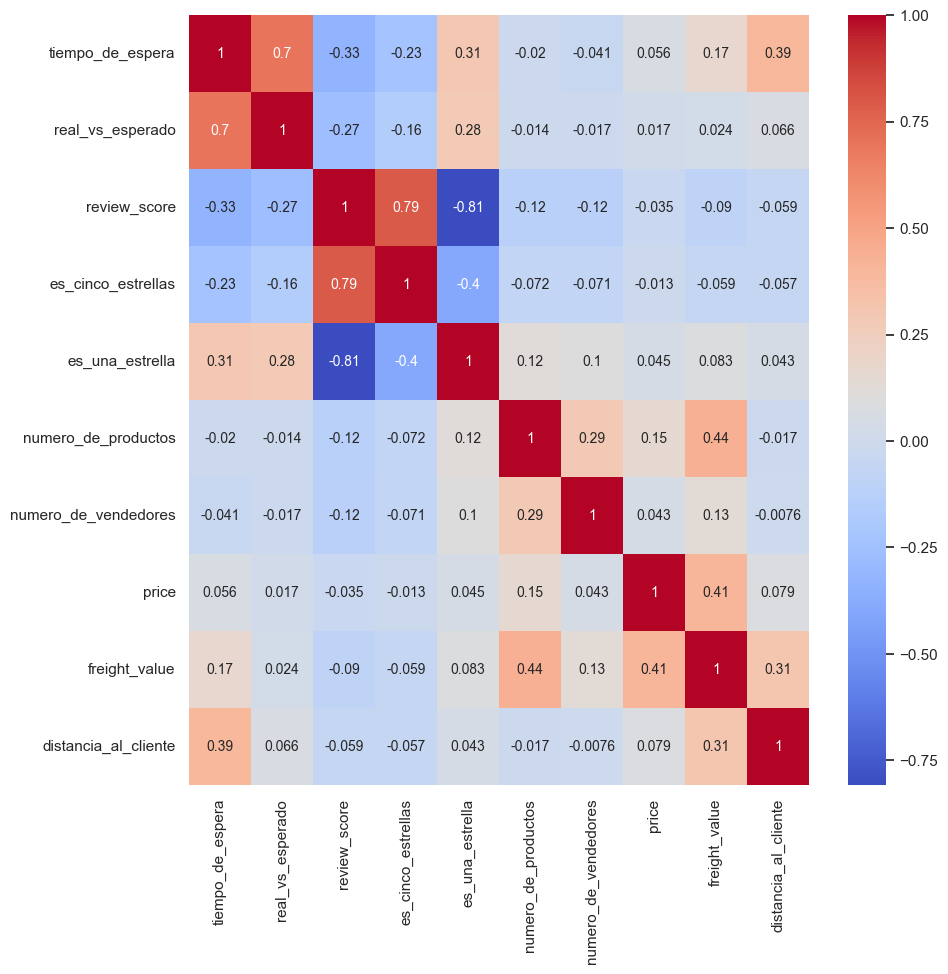

In [53]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders_analisis.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

El review_score está correlacionado negativamente con tiempo de espera, real vs esperado. En menor medida al numero de productos y vendedores.
Vamos a obviar su correlación con es cinco estrellas y es una estrella porque evidentemente la cantidad de estrellas parte de su puntuación

## 1 - Regresión Univariada

Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

***Modelo 1***:

In [54]:
import statsmodels.formula.api as smf

model1 = smf.ols(formula = "review_score ~ tiempo_de_espera", data = orders)
model2 = smf.ols(formula = "review_score ~ real_vs_esperado", data = orders)

In [55]:
model1 = model1.fit()

In [56]:
model2 = model2.fit()

In [57]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                 1.203e+04
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:39:20   Log-Likelihood:            -1.5442e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7020      0.006    742.206      0.000       4.690       4.714
tiempo_de_espera    -0.0454      0.000   -109.678      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19550.021   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35437.440
Skew:                          -1.301   Prob(JB):                         0.00
Kurtosis:                       4.451   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El hatmap indicaba que había una correlación entre las variables y la lectura del summary confirma que hay, no solo una correlación sino también una relación estadísticamente significativa

En este caso, el R-cuadrado es 0.111, lo que significa que aproximadamente el 11.1% de la variabilidad en "review_score" se puede explicar por la variable "tiempo_de_espera"

El valor p para "tiempo_de_espera" es cero, lo que indica que hay una relación estadísticamente significativa entre "tiempo_de_espera" y "review_score". 

Los valores t miden cuántas desviaciones estándar se encuentra el coeficiente estimado desde cero. Valores t más altos indican que el coeficiente es más significativo, en este caso 742 es cosiderablemente alto.

El intervalo de confianza no incluyen el valor cero, lo que respalda la significancia del coeficiente.

El coeficiente "Intercept" es 4.7020, lo que representa el valor esperado de "review_score" cuando "tiempo_de_espera" es igual a cero. El coeficiente "tiempo_de_espera" es -0.0454, lo que significa que, en promedio, un aumento de una unidad en "tiempo_de_espera" se asocia con una disminución de 0.0454 unidades en "review_score".
Esto significa que por cada día que se tenga que esperar el envío se espera una disminución del score de 0.0454

***Modelo 2***:

In [58]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7599.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:39:20   Log-Likelihood:            -1.5644e+05
No. Observations:               95880   AIC:                         3.129e+05
Df Residuals:                   95878   BIC:                         3.129e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2114      0.004   1040.850      0.000       4.203       4.219
real_vs_esperado    -0.0750      0.001    -87.171      0.000      -0.077      -0.073
==============================================================================
Omnibus:                    20659.512   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49410.751
Skew:                          -1.206   Prob(JB):                         0.00
Kurtosis:                       5.559   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El hatmap indicaba que había una correlación entre las variables y la lectura del summary confirma que hay, no solo una correlación sino también una relación estadísticamente significativa

En este caso, el R-cuadrado es 0.073, lo que significa que aproximadamente el 7.3% de la variabilidad en "review_score" se puede explicar por la variable "real_vs_esperado"

El valor p para "real_vs_esperado" es cero, lo que indica que hay una relación estadísticamente significativa entre "real_vs_esperado" y "review_score". 

Los valores t es de 1040, suficientemente alto.

El intervalo de confianza no incluyen el valor cero, lo que respalda la significancia del coeficiente.

El coeficiente "Intercept" es 4.2114, lo que representa el valor esperado de "review_score" cuando "real_vs_esperado" es igual a cero. El coeficiente "real_vs_esperado" es -0.075, lo que significa que, en promedio, un aumento de una unidad en "real_vs_esperado" se asocia con una disminución de 0.075 unidades en "review_score".
Esto significa que por cada día extra que se tenga que esperar el envío se espera una disminución del score de 0.075

## 2 - Multivariate regression

***responder***
¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? ¿Cuál es más explicativa de `review_score`,`tiempo_de_espera` o `real_vs_esperado` ?



El impacto en review_score de agregar un día más a real_vs_esperado es una disminución de 0,075 de score.

Basándonos en estos resultados, podemos concluir que el modelo con tiempo_de_espera es más explicativo de review_score en comparación con el modelo que utiliza real_vs_esperado. El modelo con tiempo_de_espera tiene un R-squared más alto, lo que sugiere que tiempo_de_espera explica una mayor proporción de la variabilidad en review_score'

***Modelo 3***:

In [59]:
model3 = smf.ols(formula = "review_score ~ tiempo_de_espera + real_vs_esperado", data = orders)

In [60]:
model3 = model3.fit()

In [61]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6178.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:39:20   Log-Likelihood:            -1.5427e+05
No. Observations:               95872   AIC:                         3.086e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6337      0.007    618.575      0.000       4.619       4.648
tiempo_de_espera    -0.0384      0.001    -66.389      0.000      -0.040      -0.037
real_vs_esperado    -0.0201      0.001    -17.030      0.000      -0.022      -0.018
==============================================================================
Omnibus:                    19980.807   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40309.882
Skew:                          -1.250   Prob(JB):                         0.00
Kurtosis:                       4.959   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nuestra regresión multivariante nos permite aislar el impacto de una característica, mientras controlamos el efecto de otras características. Estos nuevos coeficientes se denominan **`coeficientes de correlación parcial`**.

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

***Modelo 4***:

¿Que variables considerar?

In [62]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'status_de_la_orden', 'tiempo_de_espera',
       'tiempo_de_espera_previsto', 'real_vs_esperado', 'review_score',
       'es_cinco_estrellas', 'es_una_estrella', 'numero_de_productos',
       'numero_de_vendedores', 'price', 'freight_value',
       'distancia_al_cliente'],
      dtype='object')

Crear el `modelo4`

In [63]:
model4 = smf.ols(formula = "review_score ~ tiempo_de_espera + real_vs_esperado + numero_de_productos + numero_de_vendedores + price + freight_value + distancia_al_cliente", data = orders)

In [64]:
model4 = model4.fit()

In [65]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2319.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:39:21   Log-Likelihood:            -1.5259e+05
No. Observations:               95872   AIC:                         3.052e+05
Df Residuals:                   95864   BIC:                         3.053e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.9797      0.033    182.752      0.000       5.916       6.044
tiempo_de_espera        -0.0467      0.001    -71.167      0.000      -0.048      -0.045
real_vs_esperado        -0.0106      0.001     -8.645      0.000      -0.013      -0.008
numero_de_productos     -0.2422      0.008    -28.873      0.000      -0.259      -0.226
numero_de_vendedores    -1.0635      0.032    -32.759      0.000      -1.127      -1.000
price                -1.449e-05   2.03e-05     -0.713      0.476   -5.43e-05    2.53e-05
freight_value            0.0002      0.000      0.899      0.369      -0.000       0.001
distancia_al_cliente     0.0002   7.75e-06     21.061      0.000       0.000       0.000
==============================================================================
Omnibus:                    18735.363   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37602.361
Skew:                          -1.177   Prob(JB):                         0.00
Kurtosis:                       4.968   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
- ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)
- ¿Cómo ha cambiado el rendimiento general de la regresión?
- ¿Es esta regresión estadísticamente significativa?

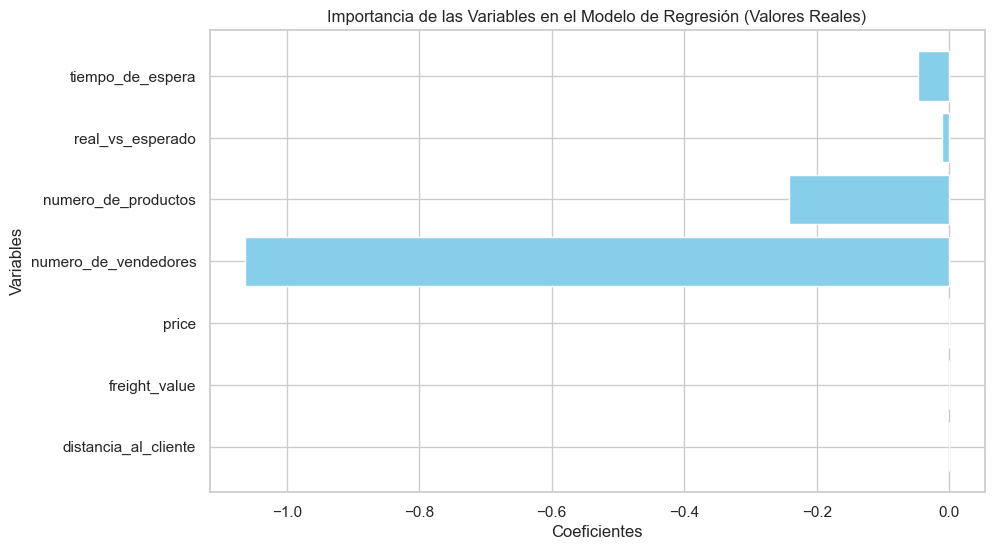

In [66]:


# Valores de los coeficientes reales
coeficientes_reales = [ -0.0467, -0.0106, -0.2422, -1.0635, -1.449e-05, 0.0002, 0.0002]

# Nombres de las variables
nombres_variables = ['tiempo_de_espera', 'real_vs_esperado', 'numero_de_productos', 'numero_de_vendedores', 'price', 'freight_value', 'distancia_al_cliente']

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(nombres_variables, coeficientes_reales, color='skyblue')
plt.xlabel('Coeficientes')
plt.ylabel('Variables')
plt.title('Importancia de las Variables en el Modelo de Regresión (Valores Reales)')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la variable más importante en la parte superior
plt.show()


Las características más importantes son "tiempo_de_espera," "real_vs_esperado," "numero_de_productos," "numero_de_vendedores,"  debido a sus coeficientes significativamente diferentes de cero y magnitudes considerable y su valor p igual a 0.

La regresión mejoró, pero no significativamente ya que pasó de 0.114 a 0.145. Solo explica un 3,1% más de la variabilidad de el score.

En tu caso, el R-cuadrado es 0.145, lo que significa que el modelo explica el 14.5% de la variabilidad en los puntajes de revisión. Esto sugiere que el modelo no explica una gran parte de la variabilidad en los datos.


- ¿Cual es la variable que más impacto tiene?
- qué pasa con productos y vendedores cuando hay más?
- Que pasa con la distancia?
- Que pasa con precio y transporte?
    
- Qué pasa con F-statistics y p-value?

- Analizar R cuadrado

Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.





La variable que tiene el mayor impacto en el score parece ser "numero_de_vendedores" con un coeficiente de -1.0635. Esto significa que, manteniendo todas las demás variables constantes, un incremento de uno en el número de vendedores disminuye el score en promedio en 1,0635.

Tanto "numero_de_productos" como "numero_de_vendedores" tienen coeficientes negativos significativos. Esto sugiere que un aumento en el número de productos o vendedores disminuye el score. Puede interpretarse como que los compradores pueden tener una experiencia menos satisfactoria cuando hay más productos para elegir o cuando interactúan con más vendedores.

La variable "distancia_al_cliente" tiene un coeficiente positivo pero muy poco significativo, indica que un aumento en la distancia entre el cliente y el vendedor se relaciona con scores un poco más altos.

Las variables "price" y "freight_value" no parecen tener un impacto significativo en los puntajes de revisión. Sus coeficientes son pequeños y no son estadísticamente significativos (el valor P>|t| es alto). Esto sugiere que los cambios en el precio y los costos de transporte no tienen un efecto lineal fuerte en los puntajes de revisión.

El valor del F-statistic es 2319, un valor alto del F-statistic sugiere que el modelo en su conjunto es significativo en la explicación de la variabilidad en la variable dependiente (en este caso, el score).
El valor Prob (F-statistic) es 0.00, lo que indica que al menos un coeficiente en el modelo es significativamente diferente de cero. Esto sugiere que el modelo en su conjunto es estadísticamente significativo.

El R-cuadrado es 0.145, lo que significa que el modelo explica el 14.5% de la variabilidad en los puntajes de revisión. Un R-cuadrado bajo (como en este caso) sugiere que el modelo no es muy efectivo en explicar la variabilidad en los puntajes de revisión.

## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

In [67]:
residuos = model4.predict(orders[['tiempo_de_espera', 'real_vs_esperado', 'numero_de_productos', 'numero_de_vendedores', 'price', 'freight_value', 'distancia_al_cliente']
]) - orders["review_score"]

In [68]:
residuos

0        0.305061
1        0.210139
2       -0.660380
3       -0.630213
4       -0.412877
           ...   
95875   -0.686256
95876   -0.273482
95877   -1.277349
95878    1.710643
95879   -0.546723
Length: 95880, dtype: float64

In [69]:
residuos.mean()

1.2815738679451407e-14

Practicamente cero (-0.000000000000012816776271063205)

Plotear los resultados

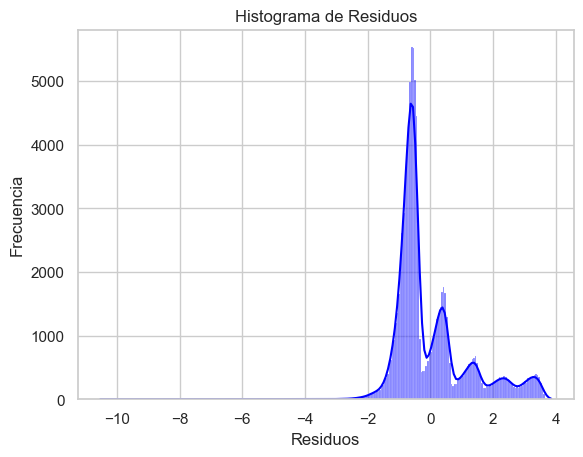

In [70]:
sns.histplot(residuos, kde=True, color='blue')

# Personaliza el gráfico
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')

# Muestra el gráfico
plt.show()

El residuo tiene 5 picos, y es lógico ya que es uno por cada puntaje posible 1,2,3,4 y 5

Computar rmse

In [71]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [72]:
y_real = orders['review_score']
X = orders[['tiempo_de_espera', 'real_vs_esperado', 'numero_de_productos', 'numero_de_vendedores', 'price', 'freight_value', 'distancia_al_cliente']]
X = sm.add_constant(X)  # Añade una constante para el término independiente
X = X.fillna(X.mean())
y_pred = model4.predict(X)

# Calcula el error cuadrado medio (MSE)
mse = mean_squared_error(y_real, y_pred)

# Calcula el RMSE tomando la raíz cuadrada del MSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 1.1884466663579056


* ¿Por qué la trama residual tiene una forma tan extraña?

Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

In [73]:
y_pred = model4.predict(orders[['tiempo_de_espera', 'real_vs_esperado', 'numero_de_productos', 'numero_de_vendedores', 'price', 'freight_value', 'distancia_al_cliente']])
y_real = orders["review_score"]

In [90]:
import numpy as np
from scipy.stats import gaussian_kde

In [92]:
y_pred = y_pred.dropna()

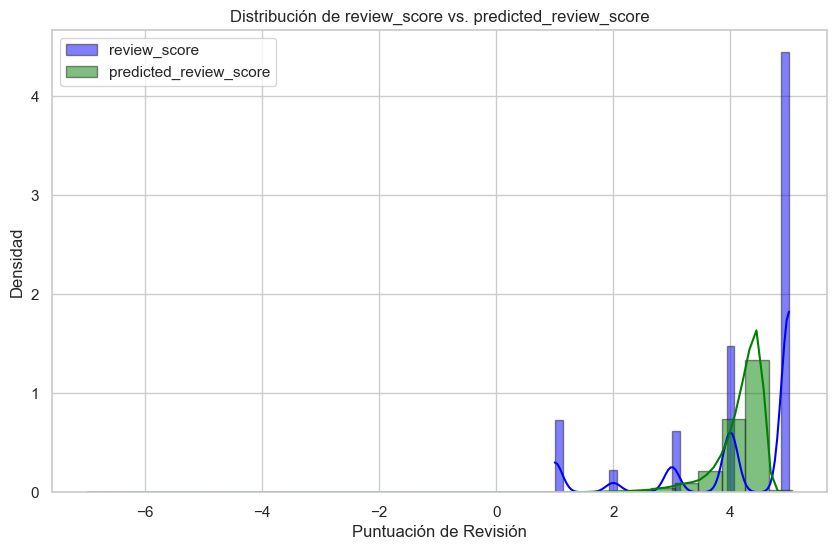

In [93]:
# Crea un gráfico de distribución
plt.figure(figsize=(10, 6))

# Histograma de datos reales
plt.hist(y_real, bins=30, density=True, alpha=0.5, color='blue', label='review_score', edgecolor='k')

# KDE de datos reales
kde_real = gaussian_kde(y_real)
x_real = np.linspace(min(y_real), max(y_real), 100)
plt.plot(x_real, kde_real(x_real), color='blue')

# Histograma de datos predichos
plt.hist(y_pred, bins=30, density=True, alpha=0.5, color='green', label='predicted_review_score', edgecolor='k')

# KDE de datos predichos
kde_pred = gaussian_kde(y_pred)
x_pred = np.linspace(min(y_pred), max(y_pred), 100)
plt.plot(x_pred, kde_pred(x_pred), color='green')

# Configura el gráfico
plt.xlabel('Puntuación de Revisión')
plt.ylabel('Densidad')
plt.title('Distribución de review_score vs. predicted_review_score')
plt.legend()

# Muestra el gráfico
plt.grid(True)
plt.show()

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.

In [75]:
orders.size

1342320

Tomo una sub muestra de la población, en este caso de 10.000, sobre una población de 1.342.320, menos de un 1%

In [76]:
submuestra = orders.sample(10000)

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


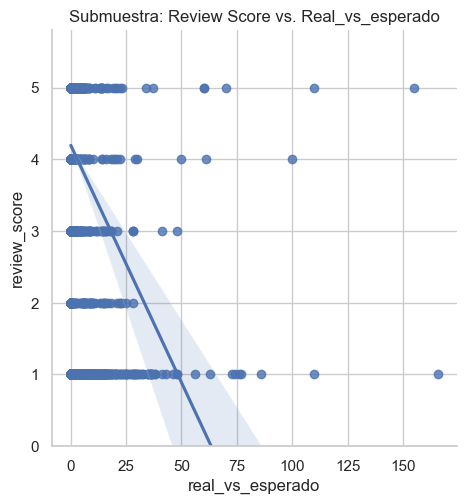

In [77]:
sns.lmplot(x="real_vs_esperado", y="review_score", data=submuestra)

plt.title("Submuestra: Review Score vs. Real_vs_esperado")
plt.ylim(0, None)

# Mostrar el gráfico
plt.show()

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


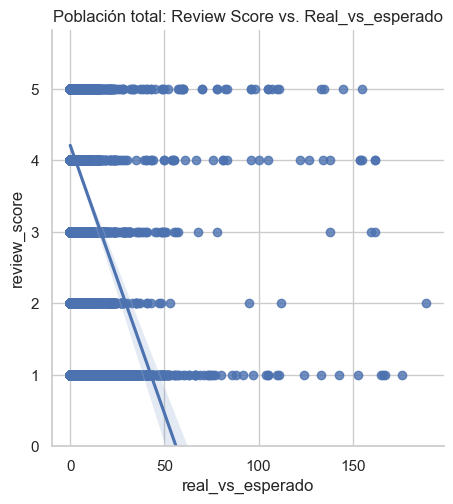

In [78]:
sns.lmplot(x="real_vs_esperado", y="review_score", data=orders)

# Personalizar el gráfico si es necesario
plt.title("Población total: Review Score vs. Real_vs_esperado")
plt.ylim(0, None)

# Mostrar el gráfico
plt.show()